In [8]:
import numpy as np
import pandas as pd
import graspologic as gs
import seaborn as sns
import matplotlib.pyplot as plt

from graspologic.embed import AdjacencySpectralEmbed as ASE
from graspologic.simulations import sbm
from graspologic.utils import remove_vertices
from graspologic.plot import pairplot, heatmap

In [9]:
P = np.array([[.8, .2], 
              [.2, .8]])
M = sbm([50, 50], P)
A, a = remove_vertices(M, indices=[0, -1], return_removed=True)

ase = ASE(n_components=2)
ase.fit(A)

fitted_latents = ase.latent_left_
predicted_latents = ase.predict(A)

### they're close but they're not on top of each other

In [3]:
np.allclose(fitted_latents, predicted_latents)

False

In [4]:
np.allclose(fitted_latents, predicted_latents, atol=1e-1)

True

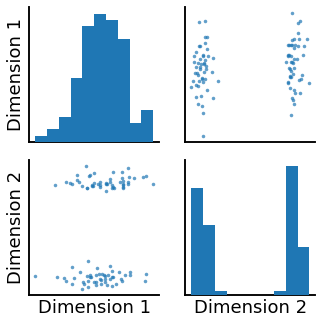

In [5]:
pairplot(fitted_latents)

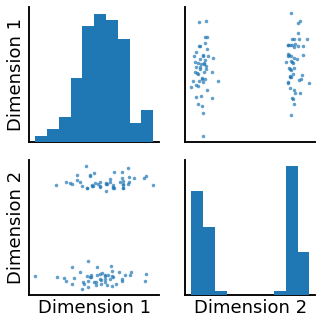

In [6]:
pairplot(predicted_latents)

In [7]:
fitted_latents_df = pd.DataFrame(fitted_latents, columns=["fit_x1", "fit_x2"])
predicted_latents_df = pd.DataFrame(predicted_latents, columns=["pred_x1", "pred_x2"])
pd.concat([fitted_latents_df, predicted_latents_df], axis='columns')

,fit_x1,fit_x2,pred_x1,pred_x2
0,0.768279,-0.527250,0.759811,-0.517829
1,0.594401,-0.553051,0.589333,-0.545407
2,0.662643,-0.637066,0.656305,-0.627186
3,0.717248,-0.612299,0.709790,-0.601978
4,0.782349,-0.495871,0.773564,-0.486843
...,...,...,...,...
93,0.669502,0.478565,0.663098,0.471144
94,0.791852,0.593069,0.782961,0.582273
95,0.760069,0.663248,0.751851,0.651620
96,0.763333,0.481036,0.755079,0.472603


### anton's new thing

1. diag aug the matrix before doing anything else (before fit, etc)
2. do not diag_aug the matrix ever

In [10]:
# set up stuff
ase = ASE(n_components=2, diag_aug=False)
P = np.array([[.8, .2], 
              [.2, .8]])
M = sbm([50, 50], P)
A, a = remove_vertices(M, indices=[0, -1], return_removed=True)

# fit and predict
ase.fit(A)
fitted_latents = ase.latent_left_
predicted_latents = ase.predict(A)

In [11]:
# eyyyyyyyyyyyyyyyyyyyyyyyyyyyy
np.allclose(fitted_latents, predicted_latents)

True